# **Autocorrelación con archivo de OpenFOAM**
---
## *Subcoordinación de Posgrado y Educación Continua.*
### [Instituto Mexicano de Tecnología del Agua](https://www.gob.mx/imta).<br>

<img src="./Datos/Imagenes/Logos.png" style="height: 7em; vertical-align: middle;">

**Alumno: Ing. Omar Ulises Robles Pereyra** <br>
**Tutor: Dr. Ariosto Aguilar Chávez** <br>

[![Open In Colab](Datos/Imagenes/colab-badge.svg)](https://colab.research.google.com/github/OmarURP/Toolbox_publica/blob/master/02_Autocorrelacion_OpenFOAM.ipynb)

In [1]:
import ImtaTURB as imta

In [2]:
file = "Datos/OpenFOAM/20_cm/U_Articulo"# Dos cilindros con condición de frontera velocidad media

In [3]:
U_probes, tiempo, coords, frecuencia = imta.cargar_U_OpenFOAM(file)

Se extrajeron 21 probes.
Tiempo inicial: 0.00 s, tiempo final: 200.00 s
Duración de la muestra: 200.00 s
Frecuencia de muestreo: 100.00 Hz (Δt = 0.0100 s)


In [4]:
# Seleccionar un probe para análisis
probe = 18
print(f"Coordenadas probe {probe}: {coords[probe]}")

# Tiempo de análisis
u1, u2, u3, tiempo, dfp_filt = imta.recortar_tiempo(U_probes, probe,
                                                    inicio= 50.0)

# Velocidades fluctuantes
u1_fluc, fig1 = imta.fluctuante(u1, tiempo=tiempo, plot=False, titulo='Velocidad u1')
u2_fluc, fig2 = imta.fluctuante(u2, tiempo=tiempo, plot=False, titulo='Velocidad u2')
u3_fluc, fig3 = imta.fluctuante(u3, tiempo=tiempo, plot=False, titulo='Velocidad u3')

Coordenadas probe 18: (0.5, 0.1, 0.3)


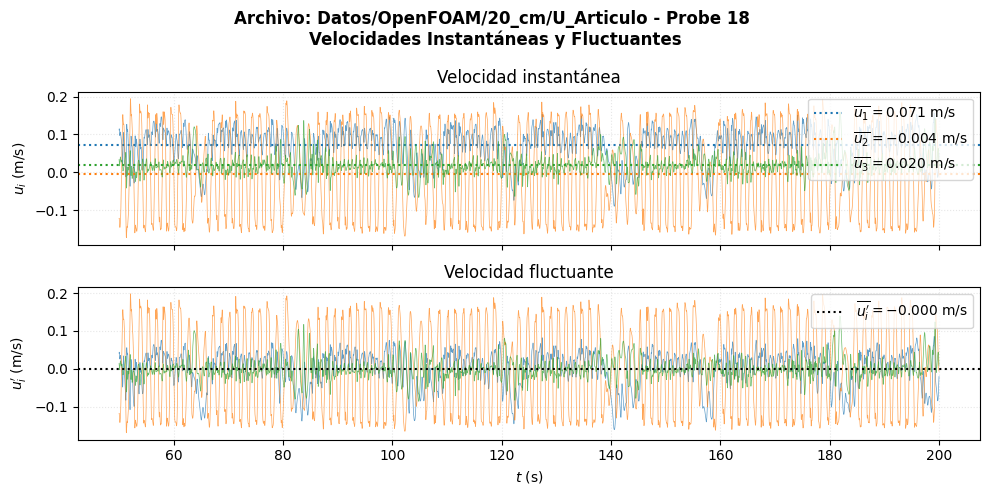

In [5]:
imta.plot_ui(tiempo, u1_fluc, u2_fluc, u3_fluc,
            titulo=f'Archivo: {file} - Probe {probe} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

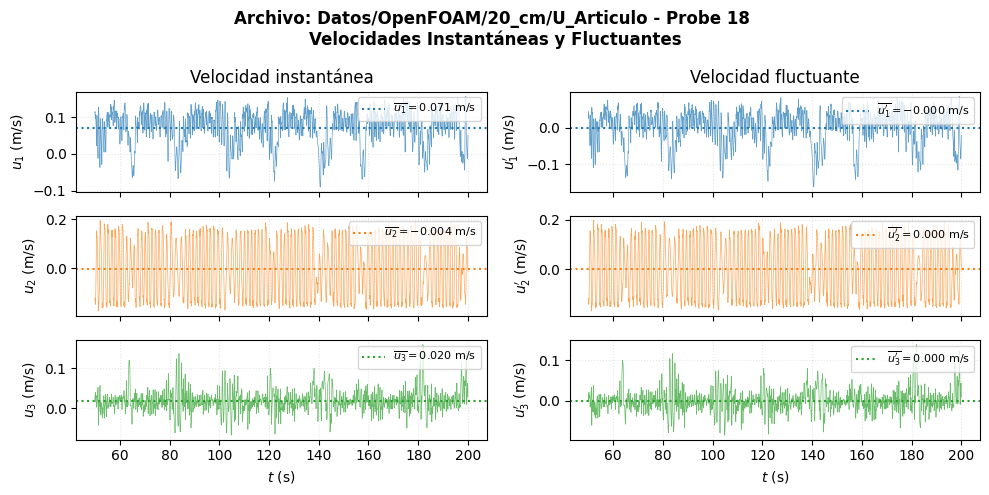

In [6]:
imta.plot_ui_grid(tiempo, u1_fluc, u2_fluc, u3_fluc,
            titulo=f'Archivo: {file} - Probe {probe} \nVelocidades Instantáneas y Fluctuantes',
            etiquetas=('u_1', 'u_2', 'u_3'));

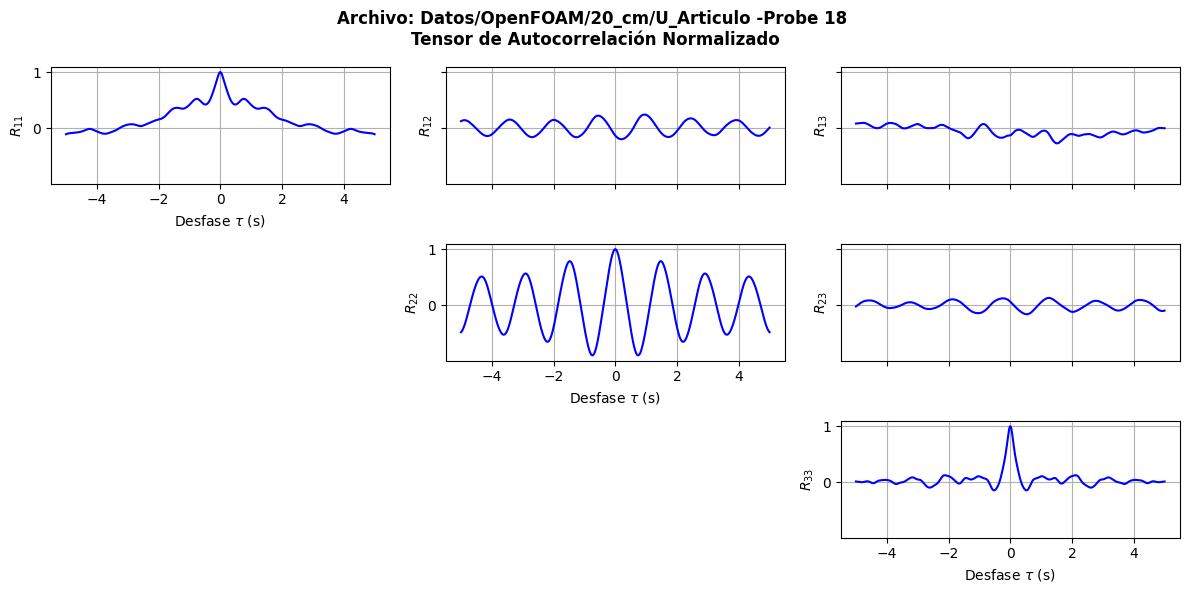

In [7]:
tensor_r, lags_s, fig = imta.autocorrelacion_norm(u1_fluc['fluc'],
                                                  u2_fluc['fluc'],
                                                  u3_fluc['fluc'],
                                                  frecuencia,
                                                  plot=True,
                                                  titulo=f'Archivo: {file} -Probe {probe} \nTensor de Autocorrelación Normalizado',
                                                  max_lag_seg=5.0)

Componente r11: Frecuencia máxima = 0.053 Hz, Energía = 1.939e+06
Componente r12: Frecuencia máxima = 0.680 Hz, Energía = 1.173e+06
Componente r13: Frecuencia máxima = 0.053 Hz, Energía = 2.825e+05
Componente r22: Frecuencia máxima = 0.680 Hz, Energía = 1.263e+07
Componente r23: Frecuencia máxima = 0.680 Hz, Energía = 4.497e+05
Componente r33: Frecuencia máxima = 0.050 Hz, Energía = 4.854e+04


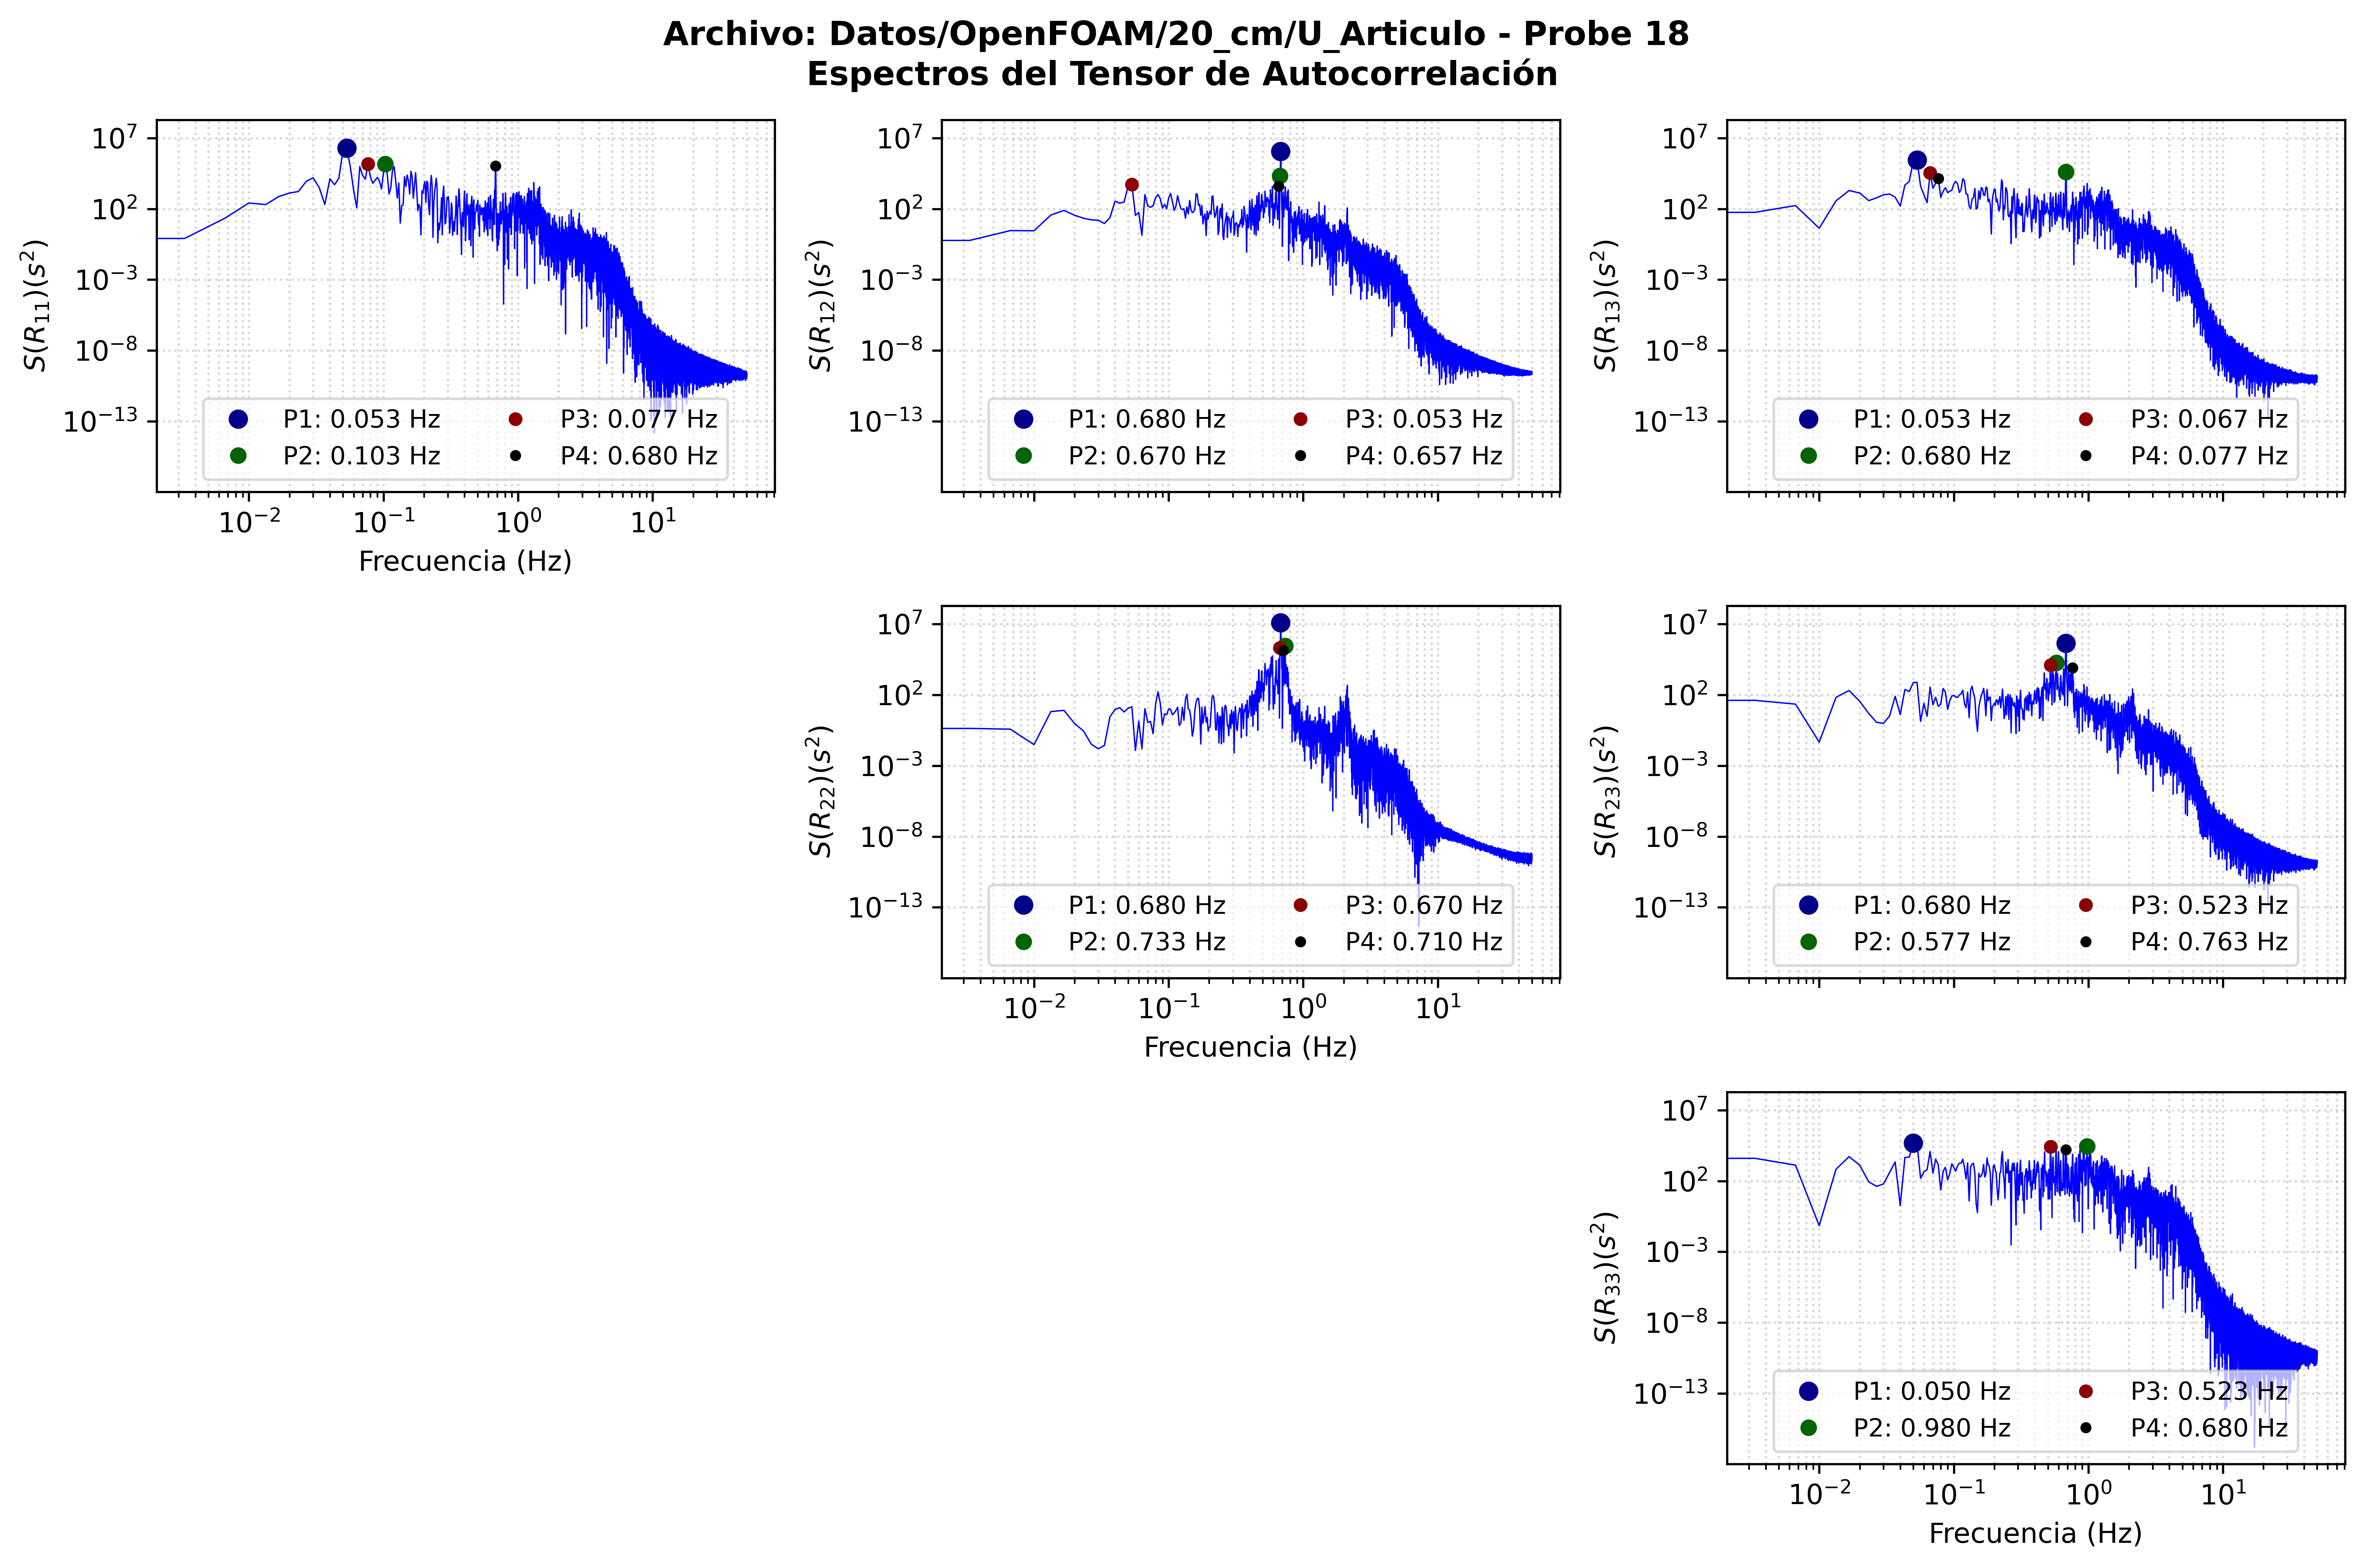

In [8]:
frecuencias, espectro, fig = imta.espectros_tensor(tensor_r,
                                                   frecuencia,
                                                   titulo=f'Archivo: {file} - Probe {probe} \nEspectros del Tensor de Autocorrelación',
                                                   plot=True)

{'r11': array([0.00000000e+00, 3.33322223e-03, 6.66644445e-03, ...,
       4.99916669e+01, 4.99950002e+01, 4.99983334e+01], shape=(15001,)), 'r12': array([0.00000000e+00, 3.33322223e-03, 6.66644445e-03, ...,
       4.99916669e+01, 4.99950002e+01, 4.99983334e+01], shape=(15001,)), 'r13': array([0.00000000e+00, 3.33322223e-03, 6.66644445e-03, ...,
       4.99916669e+01, 4.99950002e+01, 4.99983334e+01], shape=(15001,)), 'r22': array([0.00000000e+00, 3.33322223e-03, 6.66644445e-03, ...,
       4.99916669e+01, 4.99950002e+01, 4.99983334e+01], shape=(15001,)), 'r23': array([0.00000000e+00, 3.33322223e-03, 6.66644445e-03, ...,
       4.99916669e+01, 4.99950002e+01, 4.99983334e+01], shape=(15001,)), 'r33': array([0.00000000e+00, 3.33322223e-03, 6.66644445e-03, ...,
       4.99916669e+01, 4.99950002e+01, 4.99983334e+01], shape=(15001,))}


(0.0, 2.0)

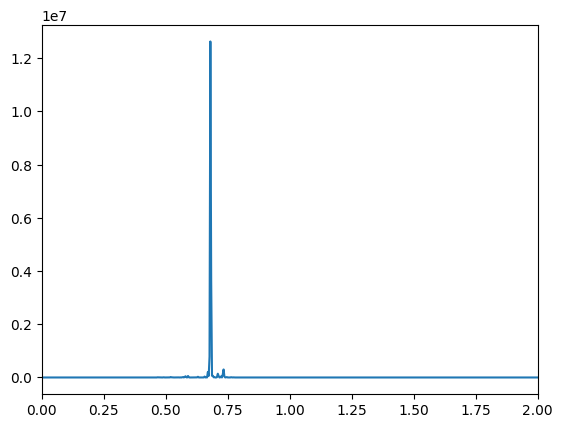

In [9]:
print(frecuencias)
import matplotlib.pyplot as plt
plt.plot(frecuencias['r22'], espectro['r22'])
plt.xlim(0, 2)